In [1]:
import utils as u
from importlib import reload
import torch
import numpy as np
import PIL
from PIL import Image

def redo():
    reload(u)

redo()

In [2]:
u.init()

{'trained_betas'} was not found in config. Values will be initialized to default values.
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.8.self_attn.k_proj.weight', 'vision_model.encoder.layers.9.self_attn.k_proj.bias', 'vision_model.encoder.layers.7.self_attn.q_proj.weight', 'vision_model.encoder.layers.16.mlp.fc2.bias', 'vision_model.encoder.layers.11.self_attn.v_proj.weight', 'vision_model.encoder.layers.12.mlp.fc1.weight', 'vision_model.encoder.layers.7.layer_norm1.weight', 'vision_model.encoder.layers.3.mlp.fc1.bias', 'vision_model.encoder.layers.2.layer_norm2.weight', 'vision_model.encoder.layers.4.self_attn.k_proj.bias', 'vision_model.encoder.layers.19.mlp.fc2.bias', 'vision_model.encoder.layers.2.layer_norm1.weight', 'vision_model.encoder.layers.1.mlp.fc2.weight', 'vision_model.encoder.layers.12.mlp.fc2.bias', 'vision_model.encoder.layers.23.self_attn.out_proj.bias', 'vision_model

# USE CASES

## generate image from text

In [3]:
redo()
#prompt = "windstorm sand etched curio"
prompt = "dog"
#ims = u.im([prompt]*4)
#u.image_grid(ims, 2, 2)

In [4]:
# load image from disk and convert to numpy array
I = Image.open('imgs/gregg.jpeg')
I = I.resize((512, 512)) # resize to 512x512
x = np.asarray(I)
z = u.encode(x)

In [5]:
type(z)

torch.Tensor

## put image into model

In [6]:
redo()
# load image from disk and convert to numpy array
I = Image.open('imgs/gregg2.jpeg')
I = I.resize((512, 512)) # resize to 512x512
x = np.asarray(I)
z = u.encode(x)
#xp1 = u.im("dog face", prior=z, start=10)
#xp2 = u.decode(z)

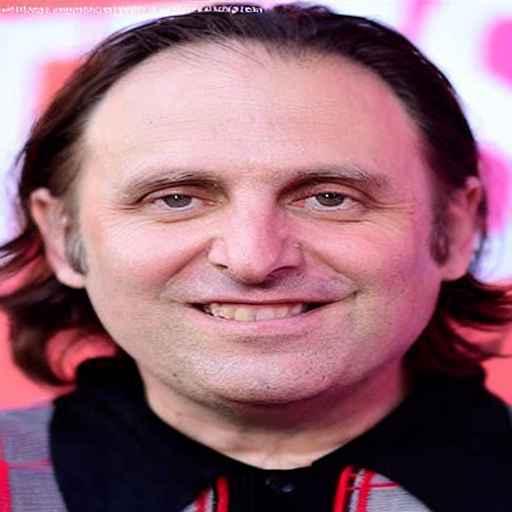

In [30]:
u.decode(z)[0]

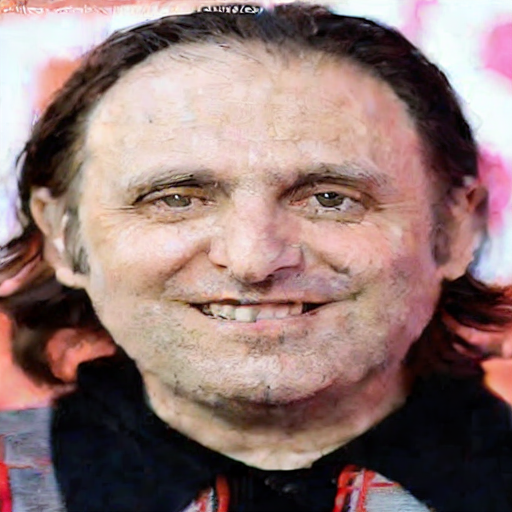

In [7]:
u.decode(u.perturb(z, 0.2))[0]

In [8]:
#xp3 = u.im("face of a man screaming in fear", start=20, prior=z)[0]
#xp3

## perturb image in model and see the result

## save out the video

In [34]:
redo()
ims = u.video("painting in the style of rembrandt", prior=z, start=20, end=70)
u.save_video(ims, "video.mp4")

0it [00:00, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [23]:
len(ims)

51

In [24]:
u.save_video(ims, "video.mp4")

OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


## TODO: interpolate between any two latents

In [ ]:
# compute the vector between the two latents, 
# and transform the latents from one point to another via affine transform
# see what is generated along these latents

## move around latents and see what they code for

# SCRATCH